### Reading and plotting data from the datapoints file

Text(0.5, 1.0, 'Distribution of pichu and pikachu sizes')

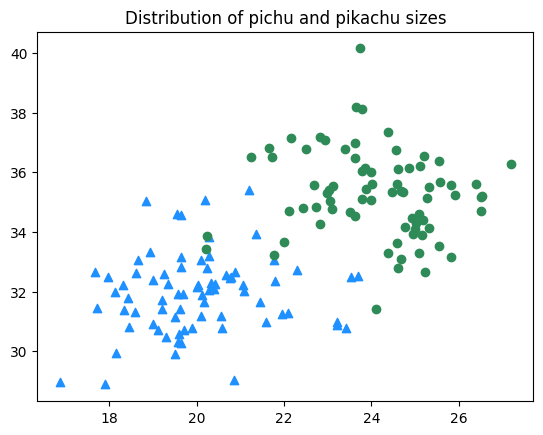

In [3]:
import matplotlib.pyplot as plt

with open('files/datapoints.txt', 'r') as dp:
    all_pokemons = [pokemon.strip("\n") for pokemon in dp.readlines()] #Remove spaces  
    all_pokemons.remove("(width (cm), height (cm), label (0-pichu, 1-pikachu))") #remove the title
    all_pokemons = [pokemon.split(",") for pokemon in all_pokemons] #the string should be splitted into lists
    all_pokemons = [[float(pokemon[0]), float(pokemon[1]), int(pokemon[2])] for pokemon in all_pokemons] #turn the elements into floats and ints 
    
    
    #creating empty lists for the pokemon type
    pichu_type = []  
    pikachu_type = []
    
    #looping through the elements in the list to create elements for the pokemon type
    for pokemon in all_pokemons:
        if pokemon[2] == 0:     #if 0 is present which implies that it is of type pichu then we add to the emptylist
            pichu_type.append(pokemon)
        else:       
            pikachu_type.append(pokemon) #else which means 1 is present then it is type of pikachu and we add to the emptylist
   
    pichu_x = []
    pichu_y = []
    for pichu in pichu_type:     # Creating variables for x and y coordinates by calling the first and last element of type pichu 
        pichu_x.append(pichu[0])
        pichu_y.append(pichu[1])

   
    pikachu_x = []
    pikachu_y = []
    for pikachu in pikachu_type:     # Creating variables for x and y coordinates by calling the first and last element of type pikachu and adding it to the list
        pikachu_x.append(pikachu[0])
        pikachu_y.append(pikachu[1])
     
    
plt.scatter(pichu_x,pichu_y,label="pichu", marker='^', color="dodgerblue")
plt.scatter(pikachu_x,pikachu_y,label="pikachu",color="seagreen")
plt.title("Distribution of pichu and pikachu sizes")


### Reading the testpoints file and plotting the datapoints and testpoints

[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


Text(0.5, 1.0, 'Distribution of data and test points')

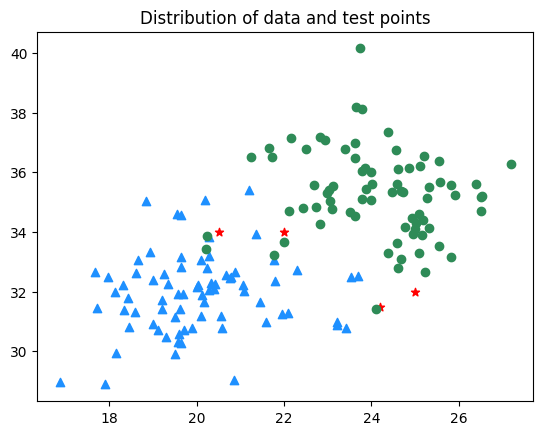

In [4]:

with open('files/testpoints.txt', 'r') as tf:
    test_points = [test_point.strip("\n") for test_point in tf.readlines()] #Remove spaces
    del test_points[0]
    test_points = [test_point.strip(",") for test_point in test_points]
    test_points = [test_point.strip("(" )[4:] for test_point in test_points] #removing the first bracket and the numbering of the testpoints
    test_points = [test_point.strip(")") for test_point in test_points]      #removing the back brackets
    test_points = [test_point.split(",") for test_point in test_points]
    test_points = [[float(test_point[0]), float(test_point[1])] for test_point in test_points] #turning them in floats 


    testpoints_x = []
    testpoints_y = []
    for testpoint in test_points:     # Creating variables for x and y coordinates by calling the first and last element of test_dots 
        testpoints_x.append(testpoint[0])
        testpoints_y.append(testpoint[1])
    
    print(test_points)

#visualization of the pokemon types and the testpoints
plt.scatter(testpoints_x,testpoints_y,label="Testpoints", marker='*', color="red")
plt.scatter(pichu_x,pichu_y,label="pichu", marker='^', color="dodgerblue")
plt.scatter(pikachu_x,pikachu_y,label="pikachu",color="seagreen")
plt.title("Distribution of data and test points")

### Classification and calculating the euclidean distance

In [5]:
import math
## this function classifies the tested point whether it is a pichu pr a pikachu.
def which_pokemon(test_point, datapoints): 
    #Create an empty list that is going to the calculated euclidean distance between the test point and a point in the datapoints.
    distance_type = []
    for i in range(0, len(datapoints)):
        euclidean_distance = [math.sqrt((datapoints[i][0]-test_point[0])**2 + (datapoints[i][1]-test_point[1])**2)] #calculating the euclidean distance
        test_type = datapoints[i][2] # to especify which pokemon type the test type is 
        distance_list =[euclidean_distance,test_type] 
        distance_type.append(distance_list)
        distance_type.sort() #Sorts the list of distances by order
    if distance_type[0][1] == 0: #If the element 1 or 0 in the list is present. 
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pichu.")     
    else:
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pikachu.")
      
    
for point in test_points:
    which_pokemon(point, all_pokemons)


Sample with (width, height): (25.0, 32.0) classified as Pikachu.
Sample with (width, height): (24.2, 31.5) classified as Pikachu.
Sample with (width, height): (22.0, 34.0) classified as Pikachu.
Sample with (width, height): (20.5, 34.0) classified as Pichu.


### Working With Inputs from the User

In [ ]:
valid = True
while valid:
    test_x = input("Enter a test point width: ")
    test_y = input("Enter a test point height: ")

    
    if test_x.isalpha() and test_y.isalpha():    #isalpha() method is used to check whether all characters in the String is an alphabet. 
        raise ValueError(f"You can only input numbers")
        
    else:
        test_x = float(test_x)
        test_y = float(test_y)
        try:
            if test_x <= 0:
                raise ValueError(f"Sorry the test point width should be positive number, not {test_x}. Please input again.")
            elif test_y <= 0:
                raise ValueError(f"Sorry the test point height should be positive number, not {test_y}. Please input again.")
            else:
                valid = False

        except ValueError as err:
            print(err)
   

test_points_list = [test_x, test_y]
which_pokemon(test_points_list, all_pokemons)   


### Checking the n-nearest neighbours

In [44]:
import math
## this function counts the n closest points to the tested point whether it is a pichu pr a pikachu.
def which_pokemon_nnearest(test_point, datapoints): 
    #Create an empty list that is going to the calculated euclidean distance between the test point and a point in the datapoints.
    distance_type = []
    for i in range(0, len(datapoints)):
        euclidean_distance = [math.sqrt((datapoints[i][0]-test_point[0])**2 + (datapoints[i][1]-test_point[1])**2)] #calculating the euclidean distance
        test_type = datapoints[i][2] # to especify which pokemon type the test type is 
        distance_list =[euclidean_distance,test_type] 
        distance_type.append(distance_list)
        distance_type.sort() #Sorts the list of distances by order
    
    n = 5          #n closest points where 5,10
    pichu_count = 0
    pikachu_count = 0
    for pokemon_type in distance_type[0:n]: #slicing till nclosest
        if pokemon_type[1] == 0: #if the first element contains 0 increase the pichu count by 1
            pichu_count += 1
        else:
            pikachu_count += 1  #increase the pikachu 
    
    
    print(pichu_count)
    print(pikachu_count)
    if pichu_count > pikachu_count: #If the five closest points contain more Pichus than Pikachus.
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pichu.")
    else:
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pikachu.")
          
      
    
for point in test_points:
    which_pokemon_nnearest(point, all_pokemons)

0
5
Sample with (width, height): (25.0, 32.0) classified as Pikachu.
4
1
Sample with (width, height): (24.2, 31.5) classified as Pichu.
1
4
Sample with (width, height): (22.0, 34.0) classified as Pikachu.
3
2
Sample with (width, height): (20.5, 34.0) classified as Pichu.
